In [35]:
import tensorflow as tf
import cv2
import numpy as np
from cv2 import imread
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from skimage.transform import resize
from matplotlib import pyplot as plt

In [36]:
waste_model = tf.keras.models.load_model('.\saved_model\waste_model_1.h5')

In [37]:
waste_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [38]:
waste_model.load_weights('./training_1/cp.ckpt')

In [44]:
im = imread("D:\\Garage_Hackathon\Dataset\\Plastic\\trash112.jpg")
img = preprocess_input(im)
img = resize(img, output_shape=(224, 224))
img = np.expand_dims(img, 0)
preds = waste_model.predict(img)
preds.shape

(1, 4)

In [48]:
waste_categories = ["Food", "Metal", "Plastic", "Paper"] # 0,1,2,3
waste_categories[np.argmax(preds, axis=1)[0]]

'Plastic'

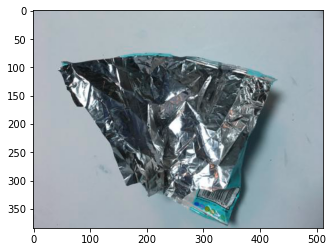

In [46]:
%matplotlib inline
plt.imshow(im)
plt.show()